# Atmospheric models

In this tutorial, we will have a look at some spectra of the DRIFT-PHOENIX atmospheric model. The DRIFT-PHOENIX model spectra are first downloaded and added to a [Database](https://species.readthedocs.io/en/latest/species.data.html?highlight=database.Database#species.data.database.Database). Then we will use the functionalities of [ReadModel](https://species.readthedocs.io/en/latest/species.read.html?highlight=ReadModel#species.read.read_model.ReadModel) to obtained synthetic spectra and photometry. Here we 

## Getting started

We start by importing the required Python modules.

In [2]:
import species
from IPython.display import Image

Then we initialize `species` by creating a default configuration file and the HDF5 database.

In [4]:
species.SpeciesInit()

Initiating species v0.3.1... [DONE]
Database: /Users/tomasstolker/applications/species/docs/tutorials/species_database.hdf5
Data folder: /Users/tomasstolker/applications/species/docs/tutorials/data
Working folder: /Users/tomasstolker/applications/species/docs/tutorials


## Adding model spectra to the database

To store the data, we create first an instance of [Database](https://species.readthedocs.io/en/latest/species.data.html?highlight=database.Database#species.data.database.Database).

In [6]:
database = species.Database()

And we then add the model spectra that we want to use (see API documentation of [add_model](https://species.readthedocs.io/en/latest/species.data.html?highlight=add_model#species.data.database.Database.add_model) for details). This step will automatically download the DRIFT-PHOENIX spectra at a spectral resolution of 2000. The dowloaded data will be stored in the `data_folder` (see [configuration file](https://species.readthedocs.io/en/latest/configuration.html)) and added to the database for further analysis.

In [7]:
database.add_model(model='drift-phoenix')

Unpacking DRIFT-PHOENIX model spectra (229 MB)... [DONE]
Adding DRIFT-PHOENIX model spectra... [DONE]                                            
Grid points stored in the database:
   - Teff = [1000. 1100. 1200. 1300. 1400. 1500. 1600. 1700. 1800. 1900. 2000. 2100.
 2200. 2300. 2400. 2500. 2600. 2700. 2800. 2900. 3000.]
   - log(g) = [3.  3.5 4.  4.5 5.  5.5]
   - [Fe/H] = [-0.6 -0.3 -0.   0.3]
Number of grid points per parameter:
   - teff: 21
   - logg: 6
   - feh: 4
Fix missing grid points with a linear interpolation:
   - teff = 1200.0, logg = 5.0, feh = -0.6
   - teff = 1600.0, logg = 3.0, feh = 0.3
   - teff = 1600.0, logg = 5.5, feh = 0.3
   - teff = 1900.0, logg = 4.5, feh = 0.3
   - teff = 1900.0, logg = 5.5, feh = 0.3
   - teff = 2200.0, logg = 5.0, feh = 0.3
   - teff = 2500.0, logg = 3.0, feh = -0.0
   - teff = 2500.0, logg = 5.5, feh = 0.3
Number of stored grid points: 504
Number of interpolated grid points: 8
Number of missing grid points: 0


/Users/tomasstolker/applications/species/species/util/data_util.py:268: RuntimeWarning: divide by zero encountered in log10
  flux = np.log10(flux)


Eight of the grid points were added with a linear, multidimensional interpolation because they were missing in the original data.

## Interpolating the model grid

In [5]:
read_model = species.ReadModel(model='drift-phoenix', wavel_range=(0.5, 10.))

In [6]:
read_model.get_bounds()

{'teff': (1000.0, 3000.0), 'logg': (3.0, 5.5), 'feh': (-0.6, 0.3)}

In [8]:
model_param = {'teff':1510., 'logg':4.1, 'feh':0.1, 'radius': 1., 'distance': 100.}

In [9]:
modelbox = read_model.get_model(model_param=model_param, spec_res=200.)

In [10]:
model_param = {'teff':1510., 'logg':4.1, 'feh':0.1, 'radius': 1., 'distance': 100., 'ism_ext': 5., 'ism_red': 3.}

In [11]:
model_ext = read_model.get_model(model_param=model_param, spec_res=200.)

In [12]:
filters = ['MKO/NSFCam.J', 'MKO/NSFCam.H', 'MKO/NSFCam.K', 'MKO/NSFCam.Lp', 'MKO/NSFCam.Mp']

In [13]:
species.plot_spectrum(boxes=[modelbox, model_ext],
                      filters=filters,
                      offset=(-0.08, -0.04),
                      xlim=(0.8, 5.),
                      ylim=(0., 5.5e-17),
                      legend={'loc': 'lower right', 'frameon': False, 'fontsize': 12.},
                      output='model_spectrum.png')

Plotting spectrum: model_spectrum.png... [DONE]


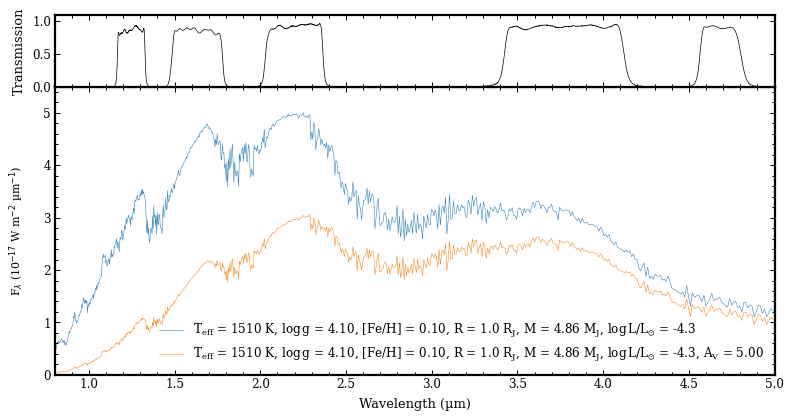

In [14]:
Image('model_spectrum.png') 

## Extracting a spectrum at a grid point

It is also possible to extract a spectrum without interpolating at one of the grid points. Let's first check what parameter values are available for the DRIFT-PHOENIX models.

In [15]:
read_model.get_points()

{'teff': array([1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700., 1800.,
        1900., 2000., 2100., 2200., 2300., 2400., 2500., 2600., 2700.,
        2800., 2900., 3000.]),
 'logg': array([3. , 3.5, 4. , 4.5, 5. , 5.5]),
 'feh': array([-0.6, -0.3, -0. ,  0.3])}

The `get_data` function is used for extracting an spectrum from the discrete parameter grid.

In [24]:
read_model.get_wavelengths()

array([ 0.1       ,  0.10002476,  0.10004953, ..., 49.97524871,
       49.98762282, 50.        ])

In [16]:
model_param = {'teff':1500., 'logg':4., 'feh':0.}

In [17]:
read_model = species.ReadModel(model='drift-phoenix', wavel_range=(0.5, 10.))

In [18]:
modelbox = read_model.get_data(model_param)

In [19]:
species.plot_spectrum(boxes=[modelbox],
                      filters=filters,
                      offset=(-0.08, -0.04),
                      xlim=(0.8, 5.),
                      ylim=(0., 1.1e5),
                      legend={'loc': 'upper right', 'frameon': False, 'fontsize': 14.},
                      output='model_spectrum.png')

Plotting spectrum: model_spectrum.png... [DONE]


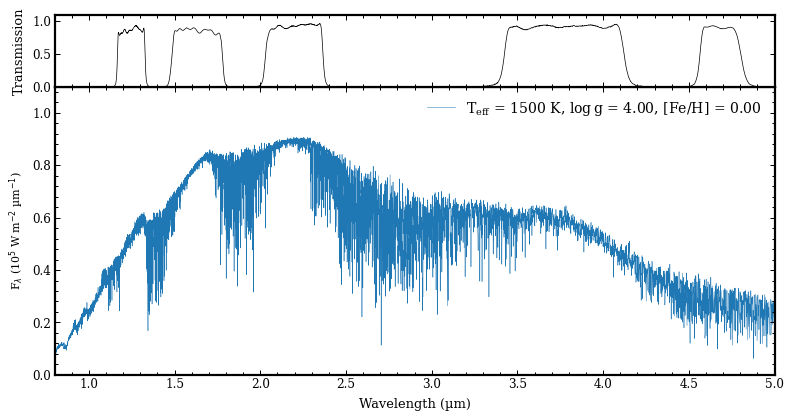

In [20]:
Image('model_spectrum.png')

## Calculating synthetic photometry

In [21]:
read_model = species.ReadModel(model='drift-phoenix', filter_name='Paranal/NACO.Mp')

In [22]:
model_param = {'teff':1510., 'logg':4.1, 'feh':0.1, 'radius': 1., 'distance': 100.}
flux = read_model.get_flux(model_param)
print(f'Flux density (W m-2 um-1) = {flux[0]:.2e}')

Flux density (W m-2 um-1) = 1.33e-17


In [23]:
app_mag, abs_mag = read_model.get_magnitude(model_param)
print(f'Apparent magnitude = {app_mag:.2f}')
print(f'Absolute magnitude = {abs_mag:.2f}')

Apparent magnitude = 15.53
Absolute magnitude = 10.53
